## 1. Introduction

With growing demands and competition in the market, a Superstore Giant likes to have a strong sense of what features matter most to maximize its sales. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018.
***

### Objective

In this project, we challenge ourselves: can we forecast the sales using the Superstore’s relevant data? 

The aim is to build a predictive model based on products, regions, categories, and customer segments to help guide the Superstore’s future sales plan.

More importantly, we want to explore which information is more useful to predict the sales. 

 - To explore, organize and analyze the data,  and make sure it's well defined.
 - To identify features that significantly affect the sales
 - To develop machine learning models that predict the sales based on relevant features
 - To provide recommendations for the superstore to maximize its sales
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))

The dataset contains: 9994 customers and 21 features.


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 3. Data Cleaning 

In [6]:
# Check null/missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 - Data is very clean and no missing value is observed.

In [7]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [8]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [10]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [11]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [14]:
# remove undesired rows/columns
To_Drop = ['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Sub-Category','Country', 'City', 'Postal Code']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', and 'Product ID' were dropped because they don't provide any helpful information.
 - 'Product Name' and 'Sub-Category' were dropped as 'Category' has the same information in more general way.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'City' was dropped, as there are too many individual cities to be accounted for, and it is similar to the information in 'State' and 'Region'.
 - 'Postal Code' was dropped.

## 4. Feature Engineering

 - 'Order Date' and 'Ship Date' are converted to 'datetime' objects instead of objects.

In [15]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [16]:
# generate a new column about the time between order and shipping to gain more information on the date
df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [33]:
df_clean = df.drop(columns=['Order Date', 'Ship Date'], axis=1)

In [38]:
df_clean = df_clean.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

In [39]:
df_clean.head()

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days
2697,Standard Class,Home Office,Florida,South,Technology,22638.480,6,0.5,-1811.0784,5
6826,Standard Class,Corporate,Indiana,Central,Technology,17499.950,5,0.0,8399.9760,7
8153,First Class,Consumer,Washington,West,Technology,13999.960,4,0.0,6719.9808,2
2623,First Class,Home Office,New York,East,Technology,11199.968,4,0.2,3919.9888,2
4190,Standard Class,Consumer,Delaware,East,Technology,10499.970,3,0.0,5039.9856,5


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 2697 to 4101
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   State         9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
 9   Waiting_Days  9994 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 858.9+ KB


In [41]:
# statistic summary
df_clean.describe()

,Sales,Quantity,Discount,Profit,Waiting_Days
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,17.280000,2.000000,0.000000,1.728750,3.000000
50%,54.490000,3.000000,0.200000,8.666500,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,7.000000


In [42]:
# aggregations to have a top-level view
df_clean.groupby(['Segment', 'Category']).mean()

Sales  Quantity  Discount     Profit  \
Segment     Category                                                     
Consumer    Furniture        351.347091  3.743037  0.176739   6.281293   
            Office Supplies  116.390194  3.760154  0.158746  18.014174   
            Technology       427.339534  3.782334  0.134385  74.445646   
Corporate   Furniture        354.519792  3.862229  0.174071  11.741201   
            Office Supplies  126.745309  3.856044  0.160604  22.102923   
            Technology       444.855810  3.781588  0.131949  79.723823   
Home Office Furniture        336.825131  3.776243  0.165000  10.705465   
            Office Supplies  115.309021  3.827618  0.147451  24.034439   
            Technology       535.976658  3.646199  0.127193  89.152458   

                             Waiting_Days  
Segment     Category                       
Consumer    Furniture            3.878706  
            Office Supplies      3.966102  
            Technology           3.935857  
Corporate   Furniture            3.981424  
            Office Supplies      4.012088  
            Technology           4.023466  
Home Office Furniture            3.919890  
            Office Supplies      3.985171  
            Technology           3.725146

### EDA

#### Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.
Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.
Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc

 - **Target variable: Sales**

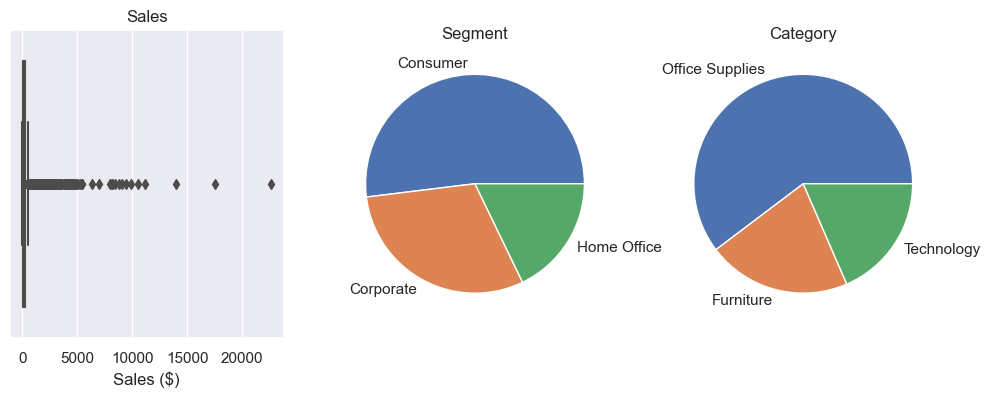

In [69]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_clean['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_clean['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_clean['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [63]:
# outliers
q1 = df_clean['Sales'].quantile(0.25)
q3 = df_clean['Sales'].quantile(0.75)
IQR = q3 - q1
filter = (df_clean['Sales'] >= q1 -1.5 *IQR) & (df_clean['Sales'] <= q3 + 1.5 *IQR)
df_cut = df_clean.loc[filter]
df_cut.shape

(8827, 10)

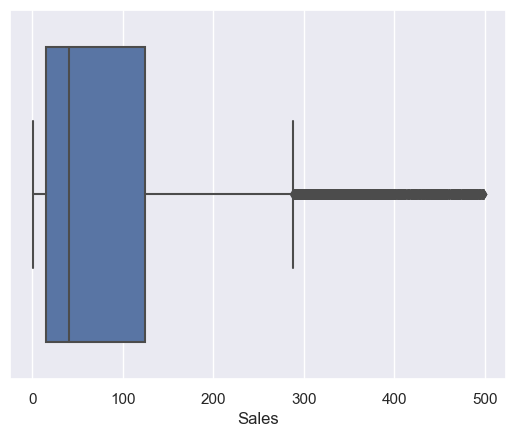

In [68]:
sns.boxplot(x=df_cut['Sales'])
plt.show();